# This program is to calculate the average lateral pressure values from two leaflets of a bilayer and interpolate it

## This program offers brief overview of matplotlib

Excellent matplotlib tutotrials:
1. https://matplotlib.org/1.5.0/users/pyplot_tutorial.html
2. https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html
3. Visulization with Seaborn: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

In [82]:
#This programme calculates the average lateral pressure profile of the two leaflets 
#Here are the things to consider when using this program:
# 1) make sure that the file contains only 2 cloumns of data: one of distance and the other of pressure values
# 2) both distances: positive and negative contain the same number of values, for e.g from -3.8 to 3.8 (not -3.8 to 4.0)
# 3) make sure that the pressure profile is centered properly, with the highest values in the center (at distance 0 nm)

import pandas as pd
import matplotlib.pyplot as plt

negative_dist = []
negative_lpp = []
positive_dist = []
positive_lpp = []

lpp_at_zero = 0

averaged_lpp = []
not_averaged_lpp = []
all_dist = []
all_lpp = []

#for lateral pressure, the file normally used is mod_c_lateralpressure.xvg
df = pd.read_csv('mod_c_lateralpressure.xvg', header=None, delimiter='\s+') #be careful of the delimiter used! A single space is different than multiple spaces
file = open("1751-2000_averaged_leaflets.xvg", "w") # create the file object to write data in it
#df.iloc[:,1] #prints the first column
#df.iloc[0][1] #prints the value on row 0 and cloumn 1

for i in range(0, df.iloc[:,1].count()):
    if df.iloc[i][0] < 0:
        negative_dist.append(df.iloc[i][0]) #all negative distances (lower than 0) go in this list
        negative_lpp.append(df.iloc[i][1]) #corresponding negative pressures go in this one
                
    elif df.iloc[i][0] == 0:
        
        lpp_at_zero = df.iloc[i][1]

    elif df.iloc[i][0] > 0:
        positive_dist.append(df.iloc[i][0]) #all positive distances (greater than 0) go in this list
        positive_lpp.append(df.iloc[i][1]) #corresponding positive pressures go in this one

negative_lpp.reverse() # reverses the list so that we can calculate the average
#print(positive_lpp)

for i in range(0, len(negative_lpp)-1):
    averaged_lpp.append((negative_lpp[i]+positive_lpp[i])/2)

averaged_lpp.reverse()
#averaged_lpp
for i in range(0, len(negative_dist)-1):
    print(negative_dist[i+1], averaged_lpp[i])
    file.write(""+str(negative_dist[i+1])+" "+str(averaged_lpp[i])+"\n") # write the negative dist and lpp
    all_dist.append(negative_dist[i+1])
    all_lpp.append(averaged_lpp[i])

print('0', lpp_at_zero)                
file.write('0 '+str(lpp_at_zero)+"\n") #write the dist 0 and corresponding lpp
all_dist.append(0)
all_lpp.append(lpp_at_zero)

negative_dist.reverse() 
averaged_lpp.reverse()

for i in range(0, len(negative_dist)-1):
    print(negative_dist[i]*-1, averaged_lpp[i])
    file.write(""+str(negative_dist[i]*-1)+ " " +str(averaged_lpp[i])+ "\n") #write the positive dist and lpp
    all_dist.append(negative_dist[i]*-1)
    all_lpp.append(averaged_lpp[i])

file.close()

-4.371642720893678 30.54658154070547
-4.265017288676758 40.963882169232555
-4.15839185645984 28.689262878536915
-4.0517664242429206 52.65458402658481
-3.9451409920260017 66.05326981000997
-3.8385155598090823 96.37174731416286
-3.731890127592163 88.1186064621848
-3.625264695375245 86.82696526639117
-3.5186392631583256 117.4209810879594
-3.4120138309414068 146.60675761274098
-3.305388398724488 195.1577692971146
-3.198762966507569 166.8254397428451
-3.09213753429065 262.3339460208975
-2.9855121020737307 207.3624859747178
-2.878886669856812 213.5107379606784
-2.7722612376398934 242.1664125088098
-2.665635805422974 167.6951662989728
-2.559010373206055 168.78745222717654
-2.4523849409891363 119.62063519124318
-2.345759508772217 138.5833237929275
-2.239134076555298 19.626093252181953
-2.132508644338379 -16.61228814110114
-2.0258832121214603 -65.96091749204174
-1.9192577799045412 -105.16718814129547
-1.8126323476876225 -163.19633967500644
-1.7060069154707034 -218.84820948644673
-1.599381483253

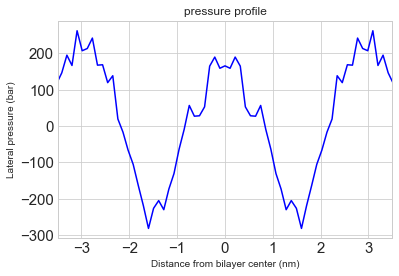

In [83]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#Following is one way of plotting by calling the plt functions each time
plt.plot(all_dist, all_lpp, 'b-', linewidth=1.5)  #the third argument in the plot() function by default is 'b-' which means a solid line of colour blue

plt.title('pressure profile') # assign title
plt.ylabel('Lateral pressure (bar)') # assigns ylabel
plt.xlabel('Distance from bilayer center (nm)') # assigns xlabel
plt.axis(xmin=-3.5, xmax=3.5) #you can also set ymin and ymax
plt.tick_params(labelsize=15)

Text(0,0.5,'Lateral pressure (bar)')

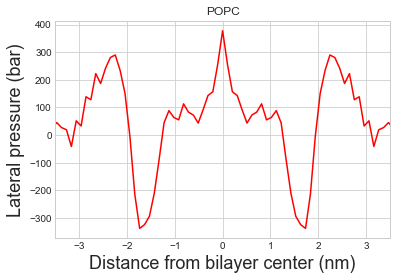

In [169]:
#Following is more of an object-oriented approach to matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

ax = plt.axes()
ax.plot(all_dist, all_lpp, 'r-', linewidth=1.5)
ax.set(xlim=(-3.5,3.5), title='POPC') #similarly, you can set ylim as well
ax.set_xlabel('Distance from bilayer center (nm)', fontsize=18)
ax.set_ylabel('Lateral pressure (bar)', fontsize=18)

In [84]:
# Here we will write the INTERPOLATION code

from scipy.interpolate import interp1d 
import numpy as np

f = interp1d(all_dist, all_lpp, kind='cubic') #all_lpp is the data we need to interpolate
file1 = open("int_1751-2000_averaged_leaflets.xvg", "w")

dist_int = np.arange(-3.6, 3.6, 0.01) #here you give the range on x-axis where you need to interpolate

lpp_int = f(dist_int)

#plt.plot(dist_int, lpp_int, 'r-')

for i in range(0, len(dist_int)-1):
    print(dist_int[i], lpp_int[i])
    file1.write(""+str(dist_int[i])+" "+str(lpp_int[i])+"\n")

file1.close()

#print(dist_int[1], lpp_int[1])
#print(dist_int)
#print(lpp_int)
#plt.plot(dist_int, lpp_int)


-3.6 92.6841982658229
-3.5900000000000003 95.56169089180936
-3.5800000000000005 98.64105636608465
-3.5700000000000007 101.8459168111433
-3.560000000000001 105.09989434947983
-3.550000000000001 108.32661110358876
-3.5400000000000014 111.44968919596461
-3.5300000000000016 114.39275074910199
-3.520000000000002 117.07941788549533
-3.510000000000002 119.45331626289408
-3.500000000000002 121.57894950163859
-3.4900000000000024 123.56599649874366
-3.4800000000000026 125.52421431383841
-3.470000000000003 127.56336000655196
-3.460000000000003 129.7931906365134
-3.4500000000000033 132.3234632633519
-3.4400000000000035 135.26393494669657
-3.4300000000000037 138.72436274617647
-3.420000000000004 142.81450372142078
-3.410000000000004 147.64361185460555
-3.4000000000000044 153.21614381660106
-3.3900000000000046 159.30364416158488
-3.380000000000005 165.6462826178602
-3.370000000000005 171.9842289137302
-3.360000000000005 178.057652777498
-3.3500000000000054 183.60672393746677
-3.3400000000000056 188.

In [12]:
ls

1001-1250_averaged_leaflets.xvg      lp.py
c_lateralpressure.xvg                md.log
center.py                            mod_c_lateralpressure.xvg
ener.edr                             output.txt
int_1001-1250_averaged_leaflets.xvg  se.py
lateralpressure.xvg                  stress_lpp.sh
localstress.dat0


In [1]:
pwd

'/Users/Ganesh/Google Drive/jupyter'

In [310]:
mv c_lateralpressure.xvg mod_c_lateralpressure.xvg

In [35]:
ls

c_lateralpressure.xvg      md.log
center.py                  mod_c_lateralpressure.xvg
ener.edr                   output.txt
lateralpressure.xvg        se.py
localstress.dat0           stress_lpp.sh
lp.py


In [81]:
cd ../../40pa-pepg/1751-2000/

/Users/Ganesh/Google Drive/jupyter/new_stress/40pa-pepg/1751-2000


In [474]:
!rm -rf int_251-500_averaged_leaflets.xvg